# Chatbot


In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install gensim

In [4]:
import gensim
import os

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [360]:
df = pd.read_csv("data\Restaurant reviews.csv");

In [1]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []

# for filename in os.listdir('data'):
#     f = open(os.path.join('data', filename),encoding="utf-8")
#     corpus = f.read()
#     raw_sent = sent_tokenize(corpus)
#     for sent in raw_sent:
#         story.append(simple_preprocess(sent))

for doc in df["Review"]:
    raw_sent = sent_tokenize(str(doc))
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

NameError: name 'df' is not defined

In [362]:
len(story)

41201

In [411]:
gen_model = gensim.models.Word2Vec(window=10, min_count=2)

In [412]:
gen_model.build_vocab(story)

In [413]:
gen_model.epochs

5

In [414]:
gen_model.train(story, total_examples= gen_model.corpus_count, epochs = gen_model.epochs)

AttributeError: 'Sequential' object has no attribute 'corpus_count'

In [481]:
gen_model.wv.most_similar("bill")

[('bud', 0.3137842118740082),
 ('routine', 0.3134949803352356),
 ('popularity', 0.3058438301086426),
 ('ingredient', 0.30074140429496765),
 ('nill', 0.29903194308280945),
 ('lived', 0.287295401096344),
 ('molten', 0.28599220514297485),
 ('maine', 0.2824046015739441),
 ('cumin', 0.28145667910575867),
 ('triumph', 0.28047770261764526)]

In [416]:
len(gen_model.wv.index_to_key)

7853

In [417]:
len(gen_model.wv)

7853

In [418]:
def document_to_vec(doc):
    doc = [word for word in doc.split() if word in gen_model.wv.index_to_key]
    # print(doc)
    if len(doc) == 0:
        doc = ["the"]
    return np.mean(gen_model.wv[doc], axis=0)

In [419]:
document_to_vec("hello_world")

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [375]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [376]:
# restu_df = pd.read_json("data\intents.json") 
import pandas as pd
import json
json_file_path = "data\intents.json"
def read_json_file(file_path = "data\intents.json", intents_name="intents", ques_name="questions", tag_name="tag", ans_name="answers"):
    json_data = []
    with open(file_path, 'r') as file:
        data = json.load(file)
    print (len(data[intents_name]))
    for i in range(len(data[intents_name])):
        current_tag = data[intents_name][i][tag_name].replace(" ",'_').lower()
        current_questions = data[intents_name][i][ques_name]
        if (len(current_questions) < 40):
            continue;
        for j in range(len(current_questions)):
            record_value = {"data":current_questions[j], "label":current_tag}
            # print(current_questions[j])
            json_data.append(record_value)
    return pd.DataFrame(json_data)
        
# # Read the JSON file

# with open(json_file_path, 'r') as file:
#     data = json.load(file)

# # Create a DataFrame from the 'intents' data
# restu_df = pd.DataFrame(data['intents'])


In [377]:
rdf = read_json_file()


430


In [484]:
rdf.sample(10)
rdf.duplicated().value_counts()

False    369
Name: count, dtype: int64

In [379]:
# drop duplicate
rdf = rdf.drop_duplicates()
rdf.duplicated().value_counts()

False    369
Name: count, dtype: int64

In [380]:
len(rdf['label'].unique())

8

In [381]:
grp_df = rdf.groupby("label").size().sort_values(ascending=False)
grp_df.head(20)

label
reservation            58
sustainability         49
specials               48
hours                  47
signature_cocktails    47
desserts               40
kids_menu              40
specialty_coffees      40
dtype: int64

In [382]:
def get_filter_data(df):
    grp_df = df.groupby("label").size().sort_values(ascending=False)
    return grp_df.head(20)

In [383]:
X_data = rdf['data']
y_data = rdf["label"]

In [467]:
from sklearn.preprocessing import LabelEncoder
tag_encoder = LabelEncoder()
y = tag_encoder.fit_transform(y_data)

In [466]:
encoder.classes_

array(['desserts', 'hours', 'kids_menu', 'reservation',
       'signature_cocktails', 'specials', 'specialty_coffees',
       'sustainability'], dtype=object)

In [468]:
tag_encoder.classes_

array(['desserts', 'hours', 'kids_menu', 'reservation',
       'signature_cocktails', 'specials', 'specialty_coffees',
       'sustainability'], dtype=object)

In [385]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [386]:
# from tqdm import tqdm

# X = []
# for doc in tqdm(rdf['data'].values):
#     # print(len(document_to_vec(doc)))
#     X.append(document_to_vec(doc))
X = [document_to_vec(vec_val) for vec_val in X_data ]

In [387]:
for value in X_train:
    if len(value) != 100:
        print(len(value)) 


In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [389]:
len(X_test)

74

In [390]:
y_train

array([3, 4, 1, 4, 6, 1, 4, 0, 7, 2, 1, 6, 3, 6, 2, 1, 4, 1, 3, 4, 5, 1,
       7, 6, 6, 3, 1, 1, 4, 4, 7, 7, 7, 5, 0, 7, 6, 2, 1, 1, 7, 4, 2, 4,
       4, 3, 3, 5, 0, 5, 3, 1, 5, 3, 4, 3, 4, 3, 5, 2, 2, 1, 3, 2, 6, 3,
       4, 2, 2, 6, 0, 4, 2, 7, 1, 3, 5, 7, 5, 6, 2, 3, 7, 0, 3, 6, 7, 7,
       5, 6, 1, 6, 7, 3, 4, 1, 4, 4, 4, 3, 3, 3, 0, 3, 0, 3, 4, 4, 3, 6,
       3, 4, 1, 2, 5, 3, 1, 7, 4, 6, 6, 4, 3, 2, 3, 5, 2, 4, 3, 3, 1, 2,
       1, 3, 7, 0, 5, 3, 4, 2, 2, 7, 5, 0, 5, 7, 7, 5, 6, 7, 7, 4, 7, 3,
       1, 4, 6, 0, 1, 2, 1, 5, 6, 7, 4, 0, 5, 0, 2, 5, 6, 4, 3, 2, 7, 6,
       7, 7, 7, 1, 7, 0, 2, 1, 7, 5, 0, 1, 1, 7, 5, 5, 7, 5, 3, 0, 1, 7,
       7, 3, 4, 3, 6, 3, 4, 1, 7, 1, 0, 6, 5, 4, 3, 3, 0, 0, 0, 2, 5, 6,
       2, 1, 0, 6, 1, 7, 5, 4, 0, 4, 5, 2, 1, 2, 0, 5, 7, 0, 6, 1, 2, 4,
       7, 3, 7, 1, 3, 4, 5, 4, 3, 1, 3, 0, 3, 6, 3, 6, 3, 5, 5, 6, 7, 0,
       7, 4, 3, 4, 3, 4, 4, 3, 5, 1, 7, 7, 1, 3, 2, 0, 0, 0, 2, 0, 7, 1,
       5, 5, 6, 5, 7, 0, 1, 7, 3])

In [438]:
model = Sequential()

# model.add(Dense(100,activation="relu",input_dim=100))
# model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation="relu",input_dim=100))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='softmax'))

In [439]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               10100     
                                                                 
 dense_49 (Dense)            (None, 128)               12928     
                                                                 
 dense_50 (Dense)            (None, 32)                4128      
                                                                 
 dense_51 (Dense)            (None, 8)                 264       
                                                                 
Total params: 27420 (107.11 KB)
Trainable params: 27420 (107.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [440]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [441]:
import tensorflow as tf

X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test  = tf.stack(X_test)

In [442]:
y_train.shape

TensorShape([295])

In [443]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 24ms/step - loss: 2.0923 - accuracy: 0.1695 - val_loss: 2.0359 - val_accuracy: 0.1525
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 1.9770 - accuracy: 0.2161 - val_loss: 1.9729 - val_accuracy: 0.2034
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 1.8895 - accuracy: 0.3432 - val_loss: 1.9025 - val_accuracy: 0.2881
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 1.8162 - accuracy: 0.4195 - val_loss: 1.8611 - val_accuracy: 0.3559
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 1.7378 - accuracy: 0.4364 - val_loss: 1.8237 - val_accuracy: 0.2881
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 1.6539 - accuracy: 0.4619 - val_loss: 1.7690 - val_accuracy: 0.3559
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 1.5815 - accuracy: 0.4831 - val_loss: 1.7556 - val_accuracy: 0.3559
Epoch 8/500
8/8 [=========

In [444]:
y_prob = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [445]:
len(y_prob)

74

In [446]:
y_pred = y_prob.argmax(axis=1)

In [447]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.47297297297297297

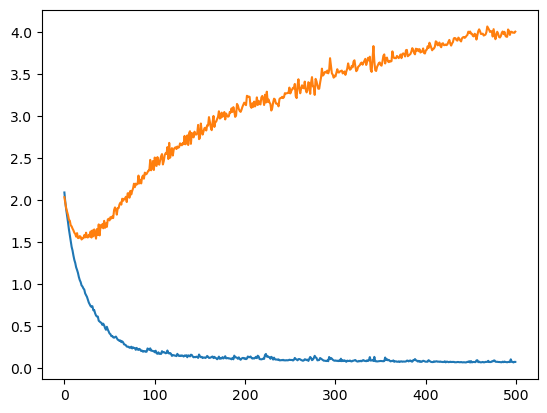

In [448]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

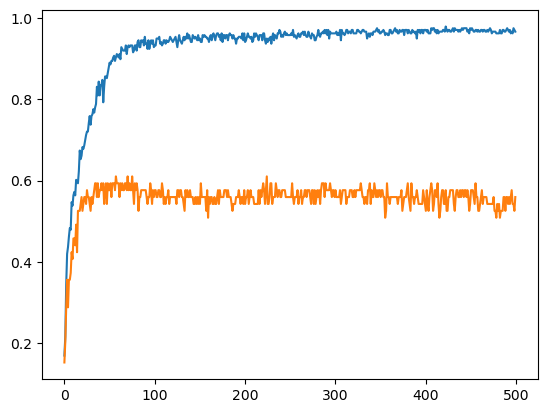

In [449]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [485]:
def chat_query(text, model):
    # split the text and covert to word 2 vec
    X_qry = document_to_vec(text)
    # reshape it into tensor flow
    # X_qry = tf.stack(X_qry)
    # print(X_qry)
    # send it to predict function
    y_qry_prob = model.predict(X_qry.reshape(1,100))
    print(y_qry_prob)
    # convert prob into argmax
    y_qey_pred = y_qry_prob.argmax(axis=1)
    # print the tag value of the ypred index
    print(y_qey_pred)
    print(tag_encoder.classes_[y_qey_pred])
    

In [452]:
model.predict(X_train)

10/10 [==============================] - 0s 1ms/step


array([[3.3540260e-08, 1.0776457e-06, 2.2172414e-14, ..., 1.6641652e-04,
        1.5898982e-10, 1.7882954e-06],
       [2.0360471e-04, 3.9858682e-05, 4.4503705e-07, ..., 1.0214697e-08,
        1.5432251e-04, 1.6641672e-05],
       [5.5145538e-21, 9.9913448e-01, 2.3477639e-13, ..., 3.0328032e-08,
        2.8564429e-09, 3.7040331e-14],
       ...,
       [6.8811541e-12, 9.9999189e-01, 1.0455116e-14, ..., 8.0329328e-06,
        5.9234807e-08, 9.8109394e-12],
       [8.6261284e-01, 2.7130105e-04, 1.2103810e-03, ..., 3.9436703e-08,
        4.0279909e-05, 6.2935976e-07],
       [9.8863483e-16, 5.2392829e-06, 2.0082203e-08, ..., 4.0156203e-09,
        8.8731711e-10, 1.5504501e-12]], dtype=float32)

In [453]:
X_train.shape

TensorShape([295, 100])

In [454]:
X_qry = document_to_vec("Hello")


In [456]:
X_qry = X_qry.reshape(1,100)

In [470]:
y_qry_prob = model.predict(X_qry)

1/1 [==============================] - 0s 30ms/step


In [480]:
chat_query("Good morning", model)
tag_encoder.classes_

1/1 [==============================] - 0s 27ms/step
[[0.00263315 0.00934225 0.00468659 0.01686759 0.61666405 0.00239095
  0.00463887 0.3427766 ]]
[4]
['signature_cocktails']


array(['desserts', 'hours', 'kids_menu', 'reservation',
       'signature_cocktails', 'specials', 'specialty_coffees',
       'sustainability'], dtype=object)

In [465]:
y.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [464]:
y_data

0            reservation
1            reservation
2            reservation
3            reservation
4            reservation
             ...        
373    specialty_coffees
374    specialty_coffees
375    specialty_coffees
376    specialty_coffees
377    specialty_coffees
Name: label, Length: 369, dtype: object